In [1351]:
# Import necessary libraries to perform EDA, Linear Regression, Ridge Regression and Lasso Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [1352]:
data = pd.read_csv('train.csv')

### Analysis

In [1353]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1355]:
data.shape

(1460, 81)

In [1356]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(12)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
dtype: float64

## 2. Data Cleaning

In [1357]:
# Removing Id field as it is unique column
data = data.drop('Id', axis=1)

In [1358]:
# removing the columns having more than 80% missing values
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 80]
print(missing_columns)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [1359]:
data = data.drop(missing_columns, axis=1)
print(data.shape)

(1460, 76)


In [1360]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1361]:
#check missing percentage again to impute data
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
YearBuilt        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
ExterQual        0.000000
ExterCond        0.000000
dtype: float64

In [1362]:
# Drop fire place quality as there are lot of missing values and it will not add value
data = data.drop('FireplaceQu', axis=1)

In [1363]:
data.shape

(1460, 75)

## 3. Numeric variables analysis

##### Imputing missing values for numeric variables

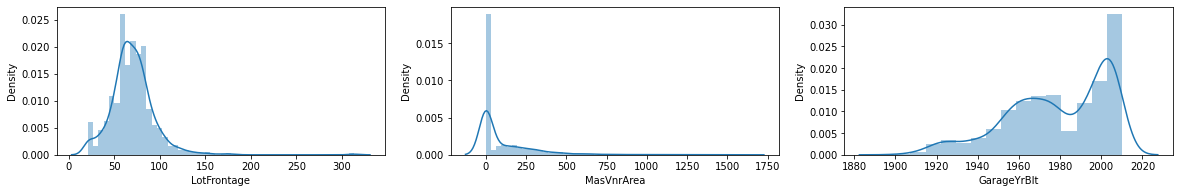

In [1364]:
# Create distribution plot before imputing values

plt.figure(figsize=(20, 6))
plt.subplot(2,3,1)
sns.distplot(data['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(data['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(data['GarageYrBlt'])
plt.show()

In [1365]:
# LotFrontage - This is a numeric variable and have 'NA'
LotFrontageMedian = data.LotFrontage.median()
#LotFrontageMedian
data['LotFrontage']= data.LotFrontage.fillna(LotFrontageMedian)

In [1366]:
# MasVnrArea - This is a numeric variable and have 'NA'
MasVnrAreaMedian = data.MasVnrArea.median()
# MasVnrAreaMedian
data['MasVnrArea']= data.MasVnrArea.fillna(MasVnrAreaMedian)

In [1367]:
# GarageYrBlt - This is a numeric variable and have 'NA'
GarageYrBltMedian = data.GarageYrBlt.median()
#GarageYrBltMedian
data['GarageYrBlt']= data.GarageYrBlt.fillna(GarageYrBltMedian)

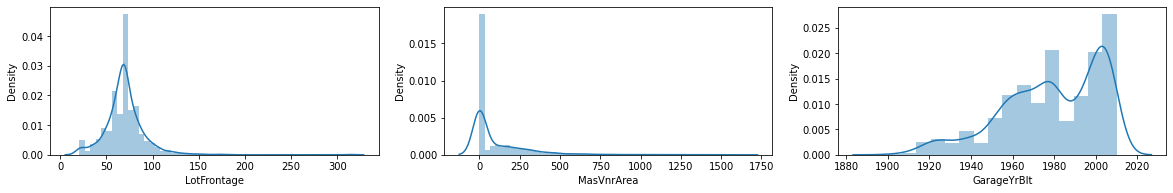

In [1368]:
# Create distribution plot after imputing values to verify that there is no deviation

plt.figure(figsize=(20, 6))
plt.subplot(2,3,1)
sns.distplot(data['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(data['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(data['GarageYrBlt'])
plt.show()

### Plot numeric variables

In [1369]:
# Create a list of only numeric variables
num_vars = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
            'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']
num_df = data[num_vars]


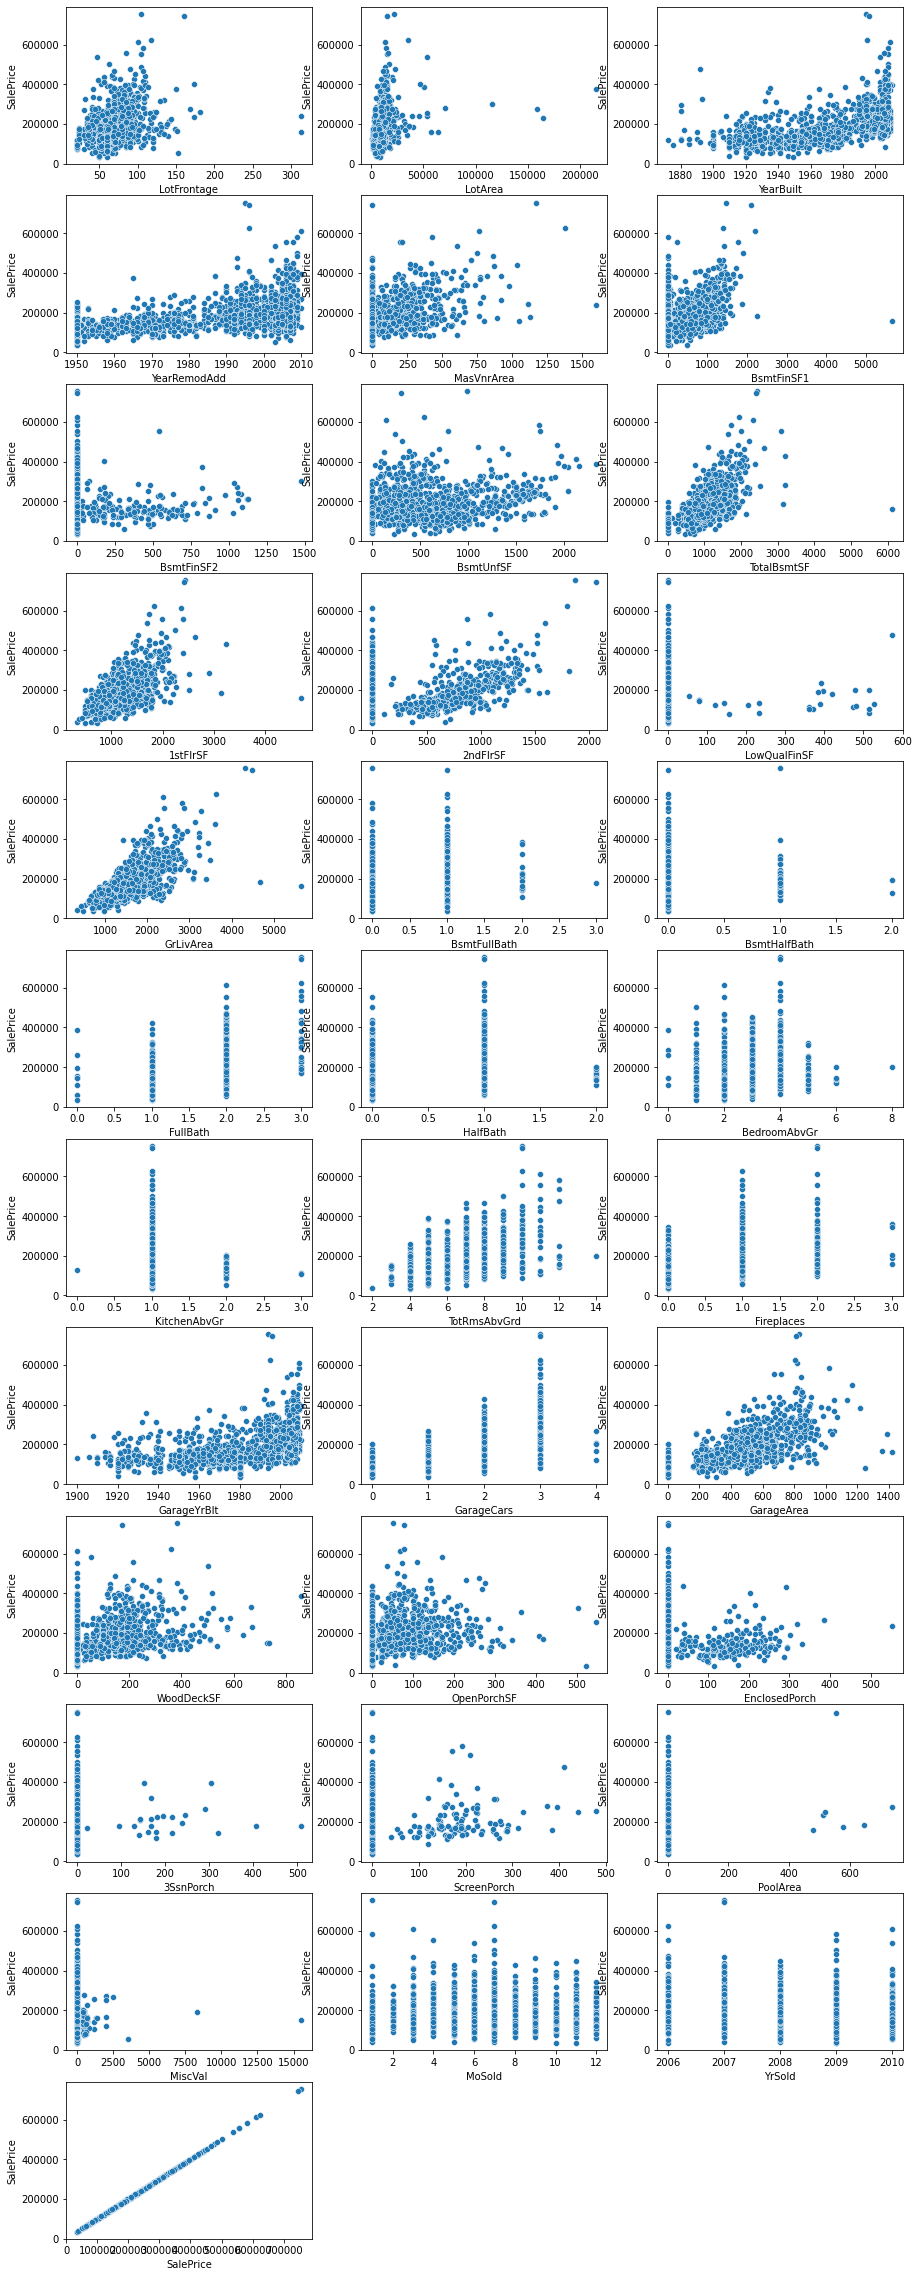

In [1370]:
plt.figure(figsize =(15, 48))
index = 1
for i in num_vars :
    plt.subplot(14, 3, index)
    index = index + 1
    sns.scatterplot(x = i, y = 'SalePrice', data=data)

plt.show()

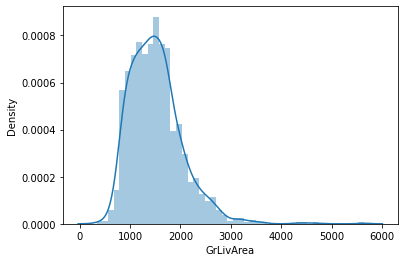

In [1371]:
#Distribution of GrLivArea Variable as we can see density in scatter plot for numeric variables at one end
sns.distplot(data['GrLivArea'])
plt.show()

In [1372]:
data['GrLivArea']=np.log(data.GrLivArea)

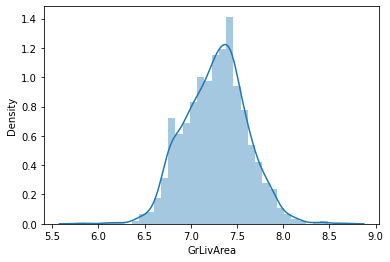

In [1373]:
#Distribution of GrLivArea Variable
sns.distplot(data['GrLivArea'])
plt.show()

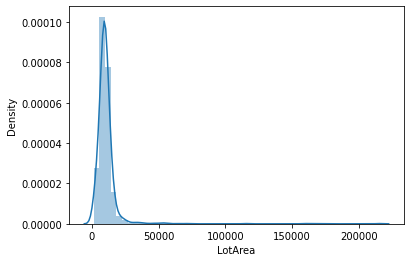

In [1374]:
#Distribution of LotArea Variable as we can see density in scatter plot for numeric variables at one end
sns.distplot(data['LotArea'])
plt.show()

In [1375]:
data['LotArea']=np.log(data.LotArea)

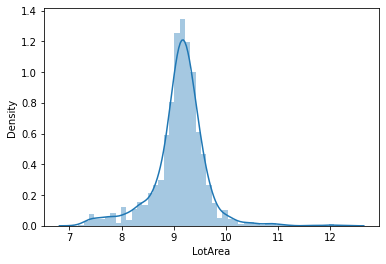

In [1376]:
#Distribution of LotArea Variable
sns.distplot(data['LotArea'])
plt.show()

#### Analyse the target variable

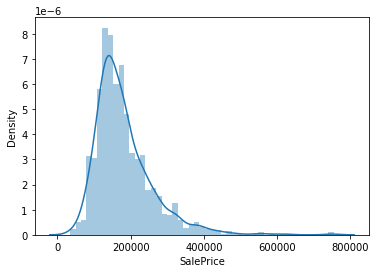

In [1377]:
#Distribution of Target Variable
sns.distplot(data['SalePrice'])
plt.show()

In [1378]:
data['SalePrice']=np.log(data.SalePrice)

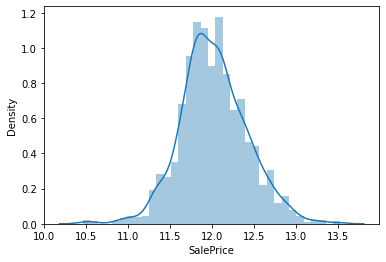

In [1379]:
#Distribution of Target Variable
sns.distplot(data['SalePrice'])
plt.show()

## 4. Categorical variables

In [1380]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [1381]:
# Analysing columns with SalePrice
def plot_with_sp(var):
    sns.barplot(x=var, y='SalePrice', data=data)

In [1382]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


Change values of numeric categorical variables to texts, so that dummy variables will be meaningful

In [1383]:
data['MSSubClass']=data['MSSubClass'].replace({
        20:'ONE_STORY_1946_NEWER_ALL_STYLES',
        30:'ONE_STORY_1945_OLDER',
        40:'ONE_STORY_W_FINISHED_ATTIC_ALL_AGES',
        45:'ONE_HALF_STORY_UNFINISHED_ALL_AGES',
        50:'ONE_HALF_STORY_FINISHED_ALL_AGES',
        60:'TWO_STORY_1946_NEWER',
        70:'TWO_STORY_1945_OLDER',
        75:'TWO_HALF_STORY_ALL_AGES',
        80:'SPLIT_OR_MULTI_LEVEL',
        85:'SPLIT_FOYER',
        90:'DUPLEX_ALL_STYLES_AND_AGES',
       120:'ONE_STORY_PUD_1946_NEWER',
       150:'OE_HALF_STORY_PUD_ALL_AGES',
       160:'TWO_STORY_PUD_1946_NEWER',
       180:'PUD_MULTILEVEL_INCL_SPLIT_LEV_OR_FOYER',
       190:'TWO_FAMILY_CONVERSION_ALL_STYLES_AGES'})

data['OverallQual']=data['OverallQual'].replace({
       10:'Very_Excellent',
       9:'Excellent',
       8:'Very_Good',
       7:'Good',
       6:'Above_Average',
       5:'Average',
       4:'Below_Average',
       3:'Fair',
       2:'Poor',
       1:'Very_Poor'})
data['OverallCond']=data['OverallCond'].replace({
       10:'Very_Excellent',
       9:'Excellent',
       8:'Very_Good',
       7:'Good',
       6:'Above_Average',
       5:'Average',
       4:'Below_Average',
       3:'Fair',
       2:'Poor',
       1:'Very_Poor'})

In [1384]:
# Visualizing the Categorical variables
categories = ['MSSubClass', 'MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
             'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
             'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 'Electrical', 'KitchenQual',
             'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

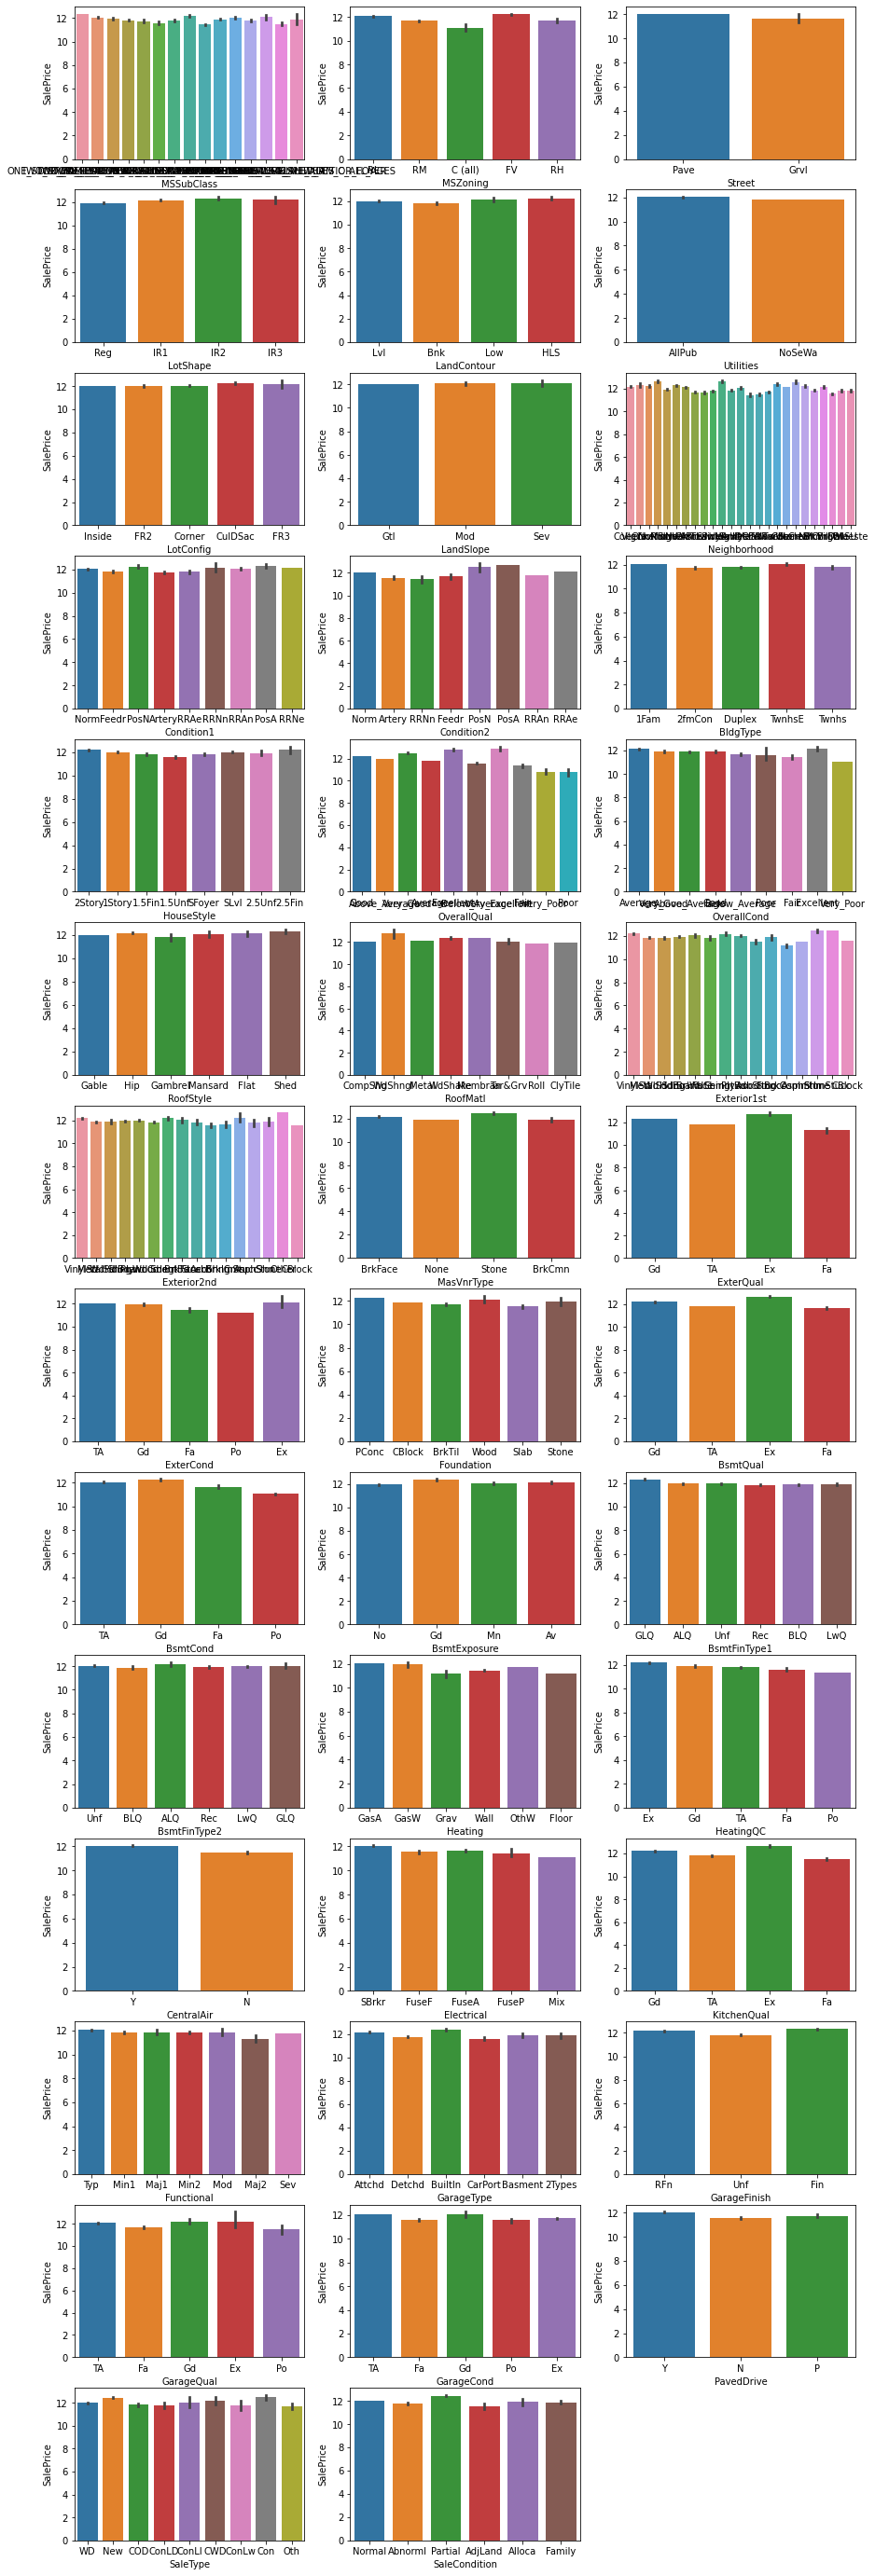

In [1385]:
plt.figure(figsize =(15, 50))
index = 1
for i in categories :
    plt.subplot(14, 3, index)
    index = index + 1
    plot_with_sp(i)


plt.show()

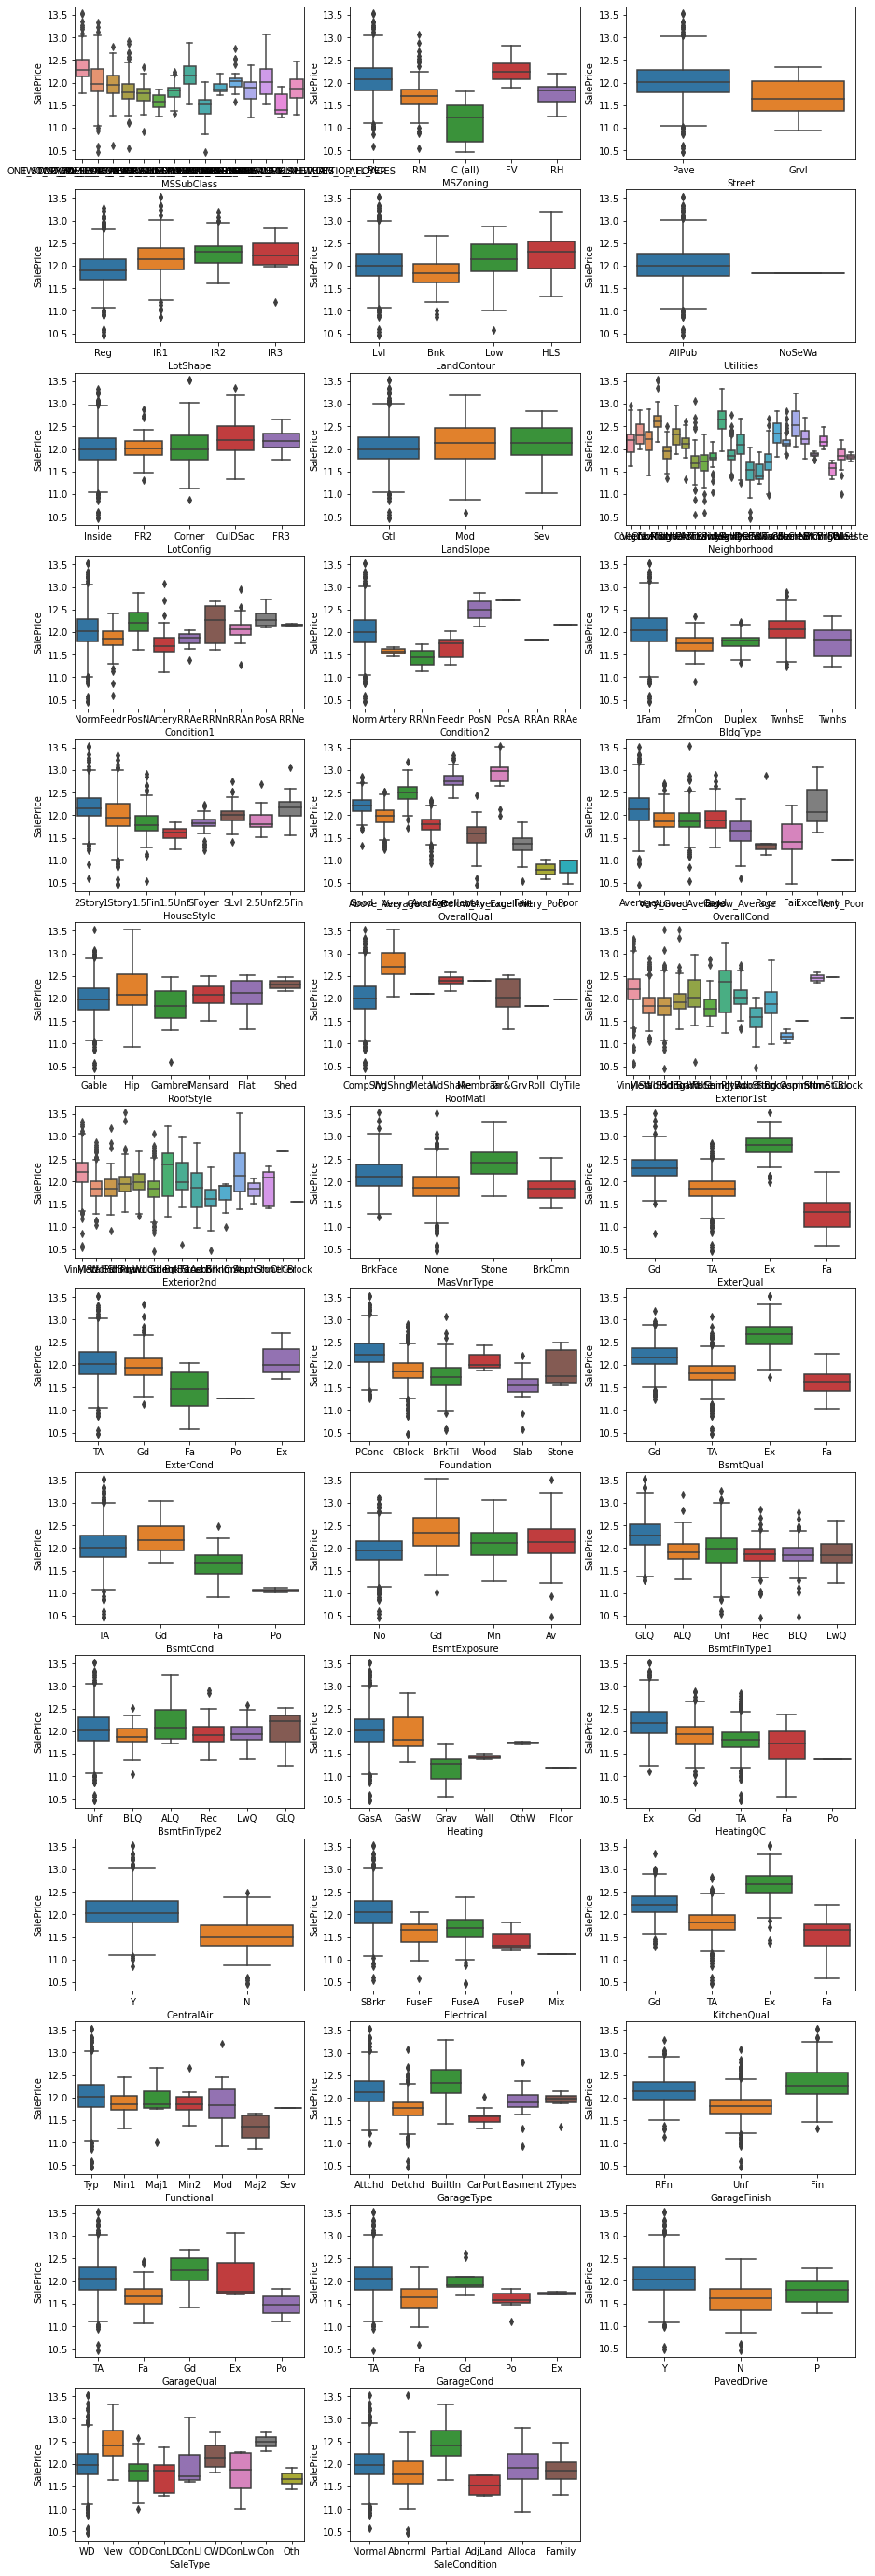

In [1386]:

plt.figure(figsize =(15, 50))
index = 1
for i in categories :
    plt.subplot(14, 3, index)
    index = index + 1
    sns.boxplot(x = i, y = 'SalePrice', data=data)

plt.show()

In [1387]:
# Create dummy variables for all categorical variables

for x in categories:
    data[x] = data[x].astype('category')

cat_vars = data[categories]
cat_vars = pd.get_dummies(cat_vars, drop_first=True)  # Dummy variables
cat_vars.head()

,MSSubClass_ONE_HALF_STORY_FINISHED_ALL_AGES,MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES,MSSubClass_ONE_STORY_1945_OLDER,MSSubClass_ONE_STORY_1946_NEWER_ALL_STYLES,MSSubClass_ONE_STORY_PUD_1946_NEWER,MSSubClass_ONE_STORY_W_FINISHED_ATTIC_ALL_AGES,MSSubClass_PUD_MULTILEVEL_INCL_SPLIT_LEV_OR_FOYER,MSSubClass_SPLIT_FOYER,MSSubClass_SPLIT_OR_MULTI_LEVEL,MSSubClass_TWO_FAMILY_CONVERSION_ALL_STYLES_AGES,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1388]:
# Merge dummy variables to main data frame and drop original categorical columns

data = pd.concat([data, cat_vars], axis=1) 
data.drop(categories,axis=1,inplace=True)

In [1389]:
data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,9.041922,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9.169518,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,9.328123,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9.164296,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,9.565214,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [1390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 261 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(6), int64(28), uint8(227)
memory usage: 711.6 KB


In [1391]:
data.shape

(1460, 261)

In [1392]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

SaleCondition_Partial    0.0
Condition1_RRNe          0.0
Condition1_RRAe          0.0
Condition1_PosN          0.0
Condition1_PosA          0.0
Condition1_Norm          0.0
Condition1_Feedr         0.0
Neighborhood_Veenker     0.0
Neighborhood_Timber      0.0
Neighborhood_StoneBr     0.0
dtype: float64

## 5. Splitting into train and test data

In [1393]:
df_train, df_test = train_test_split(data, train_size = 0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 261)
(439, 261)


In [1394]:
# Instantiate an object
scaler = MinMaxScaler()

### Fit on the data

In [1395]:
# Fit on the train data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.381897,0.876812,0.716667,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.356904,0.528986,0.000000,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.256853,0.275362,0.883333,0.00,0.000000,0.000000,0.207620,0.079378,0.145602,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.409157,0.094203,0.000000,0.00,0.000000,0.000000,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0
390,0.099315,0.349036,0.202899,0.000000,0.00,0.042700,0.265265,0.098031,0.140917,0.136343,...,0,0,0,0,1,0,0,0,1,0


In [1396]:
df_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.166332,0.362982,0.719719,0.583072,0.065306,0.079406,0.033980,0.241329,0.173813,0.184401,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.075653,0.104331,0.219718,0.343416,0.117088,0.082409,0.115907,0.192097,0.075139,0.092106,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.324798,0.594203,0.283333,0.000000,0.000000,0.000000,0.092466,0.129787,0.116667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.373724,0.731884,0.733333,0.000000,0.069454,0.000000,0.197774,0.162684,0.165278,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.195205,0.412179,0.927536,0.900000,0.098750,0.126152,0.000000,0.345034,0.215057,0.243056,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

In [1397]:
# For training, create X_train and y_train from df_train

y_train = df_train.pop('SalePrice')
X_train = df_train

In [1398]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.381897,0.876812,0.716667,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.356904,0.528986,0.000000,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.256853,0.275362,0.883333,0.00,0.000000,0.000000,0.207620,0.079378,0.145602,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.409157,0.094203,0.000000,0.00,0.000000,0.000000,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0
390,0.099315,0.349036,0.202899,0.000000,0.00,0.042700,0.265265,0.098031,0.140917,0.136343,...,0,0,0,0,1,0,0,0,1,0


## 6. Building the model with RFE

In [1399]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [1400]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 55),
 ('LotArea', False, 36),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 43),
 ('MasVnrArea', False, 75),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 119),
 ('2ndFlrSF', False, 37),
 ('LowQualFinSF', False, 236),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 67),
 ('BsmtHalfBath', False, 231),
 ('FullBath', False, 118),
 ('HalfBath', False, 224),
 ('BedroomAbvGr', False, 147),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 219),
 ('Fireplaces', False, 71),
 ('GarageYrBlt', False, 193),
 ('GarageCars', False, 93),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 82),
 ('OpenPorchSF', False, 125),
 ('EnclosedPorch', False, 121),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 105),
 ('PoolArea', False, 74),
 ('MiscVal', False, 76),
 ('MoSold', False, 234),
 ('YrSold', False, 184),
 ('MSSubClass_ONE_HALF_STORY_FINISHED_ALL_AGES', False, 27),
 ('MSSubClass_ONE_HA

In [1401]:
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageArea', 'MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES',
       'MSSubClass_TWO_STORY_PUD_1946_NEWER', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosN',
       'OverallQual_Very_Poor', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior2nd_CBlock', 'BsmtCond_Po', 'Functional_Sev'],
      dtype='object')

In [1402]:
# Columns which RFE says that are not useful
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

## Building the model with RFE selected columns

In [1403]:
X_train_rfe = X_train[col]

In [1404]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [1405]:
# Running the Linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [1406]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     290.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:                 1703.6
No. Observations:                1021   AIC:                            -3357.
Df Residuals:                     996   BIC:                            -3234.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1407]:
# Drop Exterior2nd_CBlock
X_train_new = X_train_rfe.drop('Exterior2nd_CBlock', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     302.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:                 1702.7
No. Observations:                1021   AIC:                            -3357.
Df Residuals:                     997   BIC:                            -3239.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1408]:
# Creating a data frame that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
23,BsmtCond_Po,inf
14,OverallQual_Very_Poor,inf
0,const,1451.36
11,MSZoning_RL,25.49
15,RoofMatl_CompShg,21.78
12,MSZoning_RM,19.70
19,RoofMatl_Tar&Grv,8.64
9,MSZoning_FV,7.63
20,RoofMatl_WdShake,5.89
21,RoofMatl_WdShngl,5.68


In [1409]:
# Drop BsmtCond_Po
X_train_new = X_train_new.drop('BsmtCond_Po', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     302.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:45   Log-Likelihood:                 1702.7
No. Observations:                1021   AIC:                            -3357.
Df Residuals:                     997   BIC:                            -3239.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1410]:
# Creating a data frame that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,1451.36
11,MSZoning_RL,25.49
15,RoofMatl_CompShg,21.78
12,MSZoning_RM,19.70
19,RoofMatl_Tar&Grv,8.64
9,MSZoning_FV,7.63
20,RoofMatl_WdShake,5.89
21,RoofMatl_WdShngl,5.68
10,MSZoning_RH,2.86
18,RoofMatl_Roll,2.25


In [1411]:
# Drop MSZoning_RL
X_train_new = X_train_new.drop('MSZoning_RL', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     290.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:45   Log-Likelihood:                 1664.1
No. Observations:                1021   AIC:                            -3282.
Df Residuals:                     998   BIC:                            -3169.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1412]:
# Drop MSZoning_RH
X_train_new = X_train_new.drop('MSZoning_RH', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     304.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:45   Log-Likelihood:                 1663.9
No. Observations:                1021   AIC:                            -3284.
Df Residuals:                     999   BIC:                            -3175.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1413]:
# Drop MSZoning_RM
X_train_new = X_train_new.drop('MSZoning_RM', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     319.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:46   Log-Likelihood:                 1663.6
No. Observations:                1021   AIC:                            -3285.
Df Residuals:                    1000   BIC:                            -3182.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1414]:
# Creating a data frame that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,1313.49
12,RoofMatl_CompShg,21.75
16,RoofMatl_Tar&Grv,8.62
17,RoofMatl_WdShake,5.88
18,RoofMatl_WdShngl,5.67
15,RoofMatl_Roll,2.25
13,RoofMatl_Membran,2.22
14,RoofMatl_Metal,2.22
3,TotalBsmtSF,2.13
6,GarageArea,1.71


In [1415]:
# Drop RoofMatl_CompShg
X_train_new = X_train_new.drop('RoofMatl_CompShg', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:46   Log-Likelihood:                 1540.9
No. Observations:                1021   AIC:                            -3042.
Df Residuals:                    1001   BIC:                            -2943.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1416]:
# Drop RoofMatl_Roll
X_train_new = X_train_new.drop('RoofMatl_Roll', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.7
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:46   Log-Likelihood:                 1540.9
No. Observations:                1021   AIC:                            -3044.
Df Residuals:                    1002   BIC:                            -2950.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1417]:
# Drop RoofMatl_WdShake
X_train_new = X_train_new.drop('RoofMatl_WdShake', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     283.8
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:46   Log-Likelihood:                 1540.9
No. Observations:                1021   AIC:                            -3046.
Df Residuals:                    1003   BIC:                            -2957.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1418]:
# Drop RoofMatl_Tar&Grv
X_train_new = X_train_new.drop('RoofMatl_Tar&Grv', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     301.0
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:46   Log-Likelihood:                 1539.8
No. Observations:                1021   AIC:                            -3046.
Df Residuals:                    1004   BIC:                            -2962.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1419]:
# Drop RoofMatl_Metal
X_train_new = X_train_new.drop('RoofMatl_Metal', axis=1)

# Add constant
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:46   Log-Likelihood:                 1538.4
No. Observations:                1021   AIC:                            -3045.
Df Residuals:                    1005   BIC:                            -2966.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [1420]:
# Creating a data frame that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,22.10
3,TotalBsmtSF,2.01
6,GarageArea,1.71
4,GrLivArea,1.53
1,YearBuilt,1.52
2,BsmtFinSF1,1.45
8,MSSubClass_TWO_STORY_PUD_1946_NEWER,1.24
9,MSZoning_FV,1.23
5,KitchenAbvGr,1.09
7,MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES,1.04


In [1421]:
X_train_new.columns

Index(['const', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'KitchenAbvGr', 'GarageArea',
       'MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES',
       'MSSubClass_TWO_STORY_PUD_1946_NEWER', 'MSZoning_FV', 'Condition2_PosN',
       'OverallQual_Very_Poor', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Functional_Sev'],
      dtype='object')

In [1422]:
X_train_new = X_train_new.drop(['const'], axis = 1)

### Residual Analysis

In [1423]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          1021 non-null   float64
 1   YearBuilt                                      1021 non-null   float64
 2   BsmtFinSF1                                     1021 non-null   float64
 3   TotalBsmtSF                                    1021 non-null   float64
 4   GrLivArea                                      1021 non-null   float64
 5   KitchenAbvGr                                   1021 non-null   float64
 6   GarageArea                                     1021 non-null   float64
 7   MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES  1021 non-null   uint8  
 8   MSSubClass_TWO_STORY_PUD_1946_NEWER            1021 non-null   uint8  
 9   MSZoning_FV                                    1021

In [1424]:
# Residual is the actual y_train minus predected values of y.

y_train_pred = lm.predict(X_train_lm)
y_train_pred.head()

318     0.710584
239     0.445957
986     0.411904
1416    0.401094
390     0.389002
dtype: float64

In [1425]:
# Evaluate the model
train_r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
train_r2

0.8270505949908438

### Residual

In [1426]:
# Residual
res = y_train - y_train_pred

## 7. Assumptions

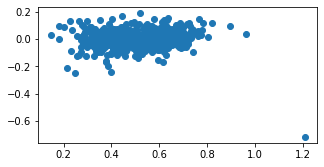

In [1427]:
# Homoscedacity assumption
fig, ax = plt.subplots(figsize=(5,2.5))
_ = ax.scatter(y_train_pred, res)
plt.show()

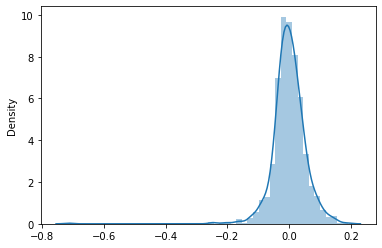

In [1428]:

sns.distplot(res)
plt.show()

# We can note that residual plot is almost normal distribution

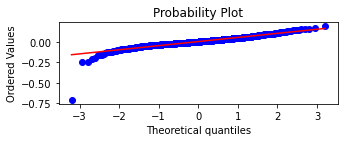

In [1429]:
fig, ax = plt.subplots(figsize=(5,1.5))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)
plt.show()

## 8. Prediction and Evaluation on test set

In [1430]:
# Create a list of only numeric variables
# transform on the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.362765,0.717391,0.350000,0.00000,0.109142,0.0,0.106164,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.414484,0.956522,0.900000,0.00000,0.000000,0.0,0.368151,0.140753,0.112963,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.335961,0.891304,0.766667,0.02375,0.000000,0.0,0.529538,0.202455,0.203935,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.368157,0.971014,0.933333,0.00000,0.000000,0.0,0.401969,0.153682,0.131250,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.381491,0.760870,0.450000,0.00000,0.092488,0.0,0.245719,0.179378,0.172685,...,0,0,0,0,1,0,0,0,1,0


In [1431]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1432]:
X_test.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)

In [1433]:
X_train_new.columns

Index(['YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageArea', 'MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES',
       'MSSubClass_TWO_STORY_PUD_1946_NEWER', 'MSZoning_FV', 'Condition2_PosN',
       'OverallQual_Very_Poor', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Functional_Sev'],
      dtype='object')

In [1434]:
# Now let us use our model to make predictions

# Creating X_test_new data frame by dropping values from X_test
X_test_new = X_test[X_test.columns.intersection(X_train_new.columns)]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)


In [1435]:
X_test_new.columns

Index(['const', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'KitchenAbvGr', 'GarageArea',
       'MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES',
       'MSSubClass_TWO_STORY_PUD_1946_NEWER', 'MSZoning_FV', 'Condition2_PosN',
       'OverallQual_Very_Poor', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Functional_Sev'],
      dtype='object')

In [1436]:
# Make predictions
y_test_pred = lm.predict(X_test_new)

In [1437]:
# Evaluate the model
test_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
test_r2

0.7727421685618638

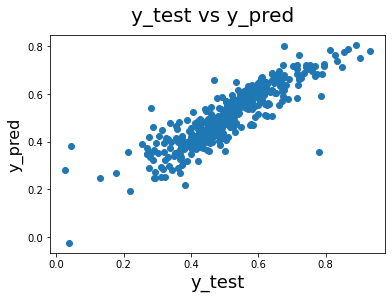

In [1438]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(10)
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)   # Plot heading
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

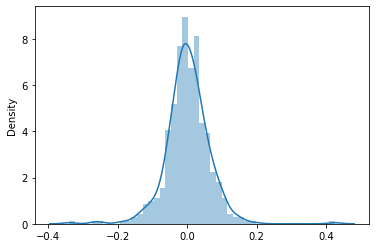

In [1439]:
# Residual
res_test = y_test - y_test_pred
sns.distplot(res_test)
plt.show()

# We can notice that residual plot of TEST is similar to that of Train

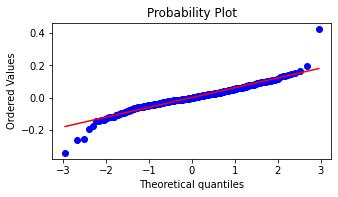

In [1440]:
fig, ax = plt.subplots(figsize=(5,2.5))
_, (__, ___, r) = sp.stats.probplot(res_test, plot=ax, fit=True)
plt.show()

# We can notice that q-q plot of TEST is similar to that of TRAIN data

In [1441]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:22:50   Log-Likelihood:                 1538.4
No. Observations:                1021   AIC:                            -3045.
Df Residuals:                    1005   BIC:                            -2966.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0455      0.008      5.716      0.000       0.030       0.061
YearBuilt                                         0.1874      0.010     19.710      0.000       0.169       0.206
BsmtFinSF1                                        0.1306      0.025      5.280      0.000       0.082       0.179
TotalBsmtSF                                       0.1829      0.032      5.725      0.000       0.120       0.246
GrLivArea                                         0.5384      0.016     33.281      0.000       0.507       0.570
KitchenAbvGr                                     -0.1678      0.015    -10.923      0.000      -0.198      -0.138
GarageArea                                        0.1271      0.015      8.585      0.000       0.098       0.156
MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES     0.0378      0.017      2.261      0.024       0.005       0.071
MSSubClass_TWO_STORY_PUD_1946_NEWER              -0.0682      0.009     -7.519      0.000      -0.086      -0.050
MSZoning_FV                                       0.0271      0.009      2.964      0.003       0.009       0.045
Condition2_PosN                                  -0.4110      0.055     -7.487      0.000      -0.519      -0.303
OverallQual_Very_Poor                            -0.1129      0.054     -2.081      0.038      -0.219      -0.006
RoofMatl_Membran                                  0.1473      0.054      2.719      0.007       0.041       0.254
RoofMatl_WdShngl                                  0.0888      0.027      3.253      0.001       0.035       0.142
Exterior1st_BrkComm                              -0.1830      0.038     -4.774      0.000      -0.258      -0.108
Functional_Sev                                   -0.1913      0.054     -3.532      0.000      -0.298      -0.085
==============================================================================
Omnibus:                      697.027   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43174.020
Skew:                          -2.434   Prob(JB):                         0.00
Kurtosis:                      34.483   Cond. No.                         45.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1442]:
reg_metric = []
reg_metric.append(train_r2)
reg_metric.append(test_r2)

# Metrics to give an overall sense of error in the model
train_rss = np.sum(np.square(y_train - y_train_pred))
reg_metric.append(train_rss)
print(train_rss)

test_rss = np.sum(np.square(y_test - y_test_pred))
reg_metric.append(test_rss)
print(test_rss)

train_mse = mean_squared_error(y_train, y_train_pred)
reg_metric.append(train_mse)
print(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
reg_metric.append(test_mse)
print(test_mse)

2.9360987309574913
1.7398289366696738
0.0028757088452081208
0.003963163864851193


### Results

The model is good. 
- R-Square is 82.7%, 
- F-Statistic is 320. 
- We can note that p-value for all the variables selected in the model is less than 0.05 which indicates the model is good. 
- We have also noted that VIF is less than 5 for the variables.

#### R2 Score for TRAIN set = 82.7%
#### R2 Score for TEST set = 77.27%

## 9. Ridge Regression

In [1443]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1444]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.4}


In [1445]:
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.18811502  0.12323434  0.17713724  0.52000939 -0.16010403  0.13354047
  0.03362046 -0.06785655  0.02655802 -0.28560281 -0.08138399  0.10535641
  0.08364103 -0.15446378 -0.13447316]


In [1446]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

In [1447]:
ridge_metric = []

ridge_r2_train = r2_score(y_train, y_pred_train)
ridge_metric.append(ridge_r2_train)
print(ridge_r2_train)

ridge_r2_test = r2_score(y_test, y_pred_test)
ridge_metric.append(ridge_r2_test)
print(ridge_r2_test)

ridge_train_rss = np.sum(np.square(y_train - y_pred_train))
ridge_metric.append(ridge_train_rss)
print(ridge_train_rss)

ridge_test_rss = np.sum(np.square(y_test - y_pred_test))
ridge_metric.append(ridge_test_rss)
print(ridge_test_rss)

ridge_train_mse = mean_squared_error(y_train, y_pred_train)
ridge_metric.append(ridge_train_mse)
print(ridge_train_mse)

ridge_test_mse = mean_squared_error(y_test, y_pred_test)
ridge_metric.append(ridge_test_mse)
print(ridge_test_mse)


0.8254676085169756
0.7840295964285727
2.9629725127828817
1.6534152210287338
0.0029020298851938115
0.00376632168799256


## 10. Lasso Regression

In [1448]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1449]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1450]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1451]:
lasso.coef_

array([ 0.18893558,  0.11742965,  0.17433802,  0.52969825, -0.15938989,
        0.13032415,  0.02674093, -0.06534113,  0.02310445, -0.29875933,
       -0.01121183,  0.04546767,  0.0666383 , -0.13399718, -0.08812302])

In [1452]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

In [1453]:
lasso_metric = []

lasso_train_r2 = r2_score(y_train, y_pred_train)
lasso_metric.append(lasso_train_r2)
print(lasso_train_r2)

lasso_test_r2 = r2_score(y_test, y_pred_test)
lasso_metric.append(lasso_test_r2)
print(lasso_test_r2)

lasso_train_rss = np.sum(np.square(y_train - y_pred_train))
lasso_metric.append(lasso_train_rss)
print(lasso_train_rss)

lasso_test_rss = np.sum(np.square(y_test - y_pred_test))
lasso_metric.append(lasso_test_rss)
print(lasso_test_rss)

lasso_train_mse = mean_squared_error(y_train, y_pred_train)
lasso_metric.append(lasso_train_mse)
print(lasso_train_mse)

lasso_test_mse = mean_squared_error(y_test, y_pred_test)
lasso_metric.append(lasso_test_mse)
print(lasso_test_mse)

0.8237907415690616
0.7822367869309406
2.9914400690459075
1.6671405207122603
0.0029299119187521133
0.003797586607545012


## 11. Summary of coefficients

In [1454]:
lm_coef = ["%.4f" % v for v in list(lm.params)]
lm_coef = lm_coef[1:]

betas = pd.DataFrame(index = ['YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageArea', 'MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES',
       'MSSubClass_TWO_STORY_PUD_1946_NEWER', 'MSZoning_FV', 'Condition2_PosN',
       'OverallQual_Very_Poor', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Functional_Sev'],
                    columns = ['LinearRegression', 'Ridge', 'Lasso'])
betas['LinearRegression'] = lm_coef
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,LinearRegression,Ridge,Lasso
YearBuilt,0.1874,0.188115,0.188936
BsmtFinSF1,0.1306,0.123234,0.117430
TotalBsmtSF,0.1829,0.177137,0.174338
GrLivArea,0.5384,0.520009,0.529698
KitchenAbvGr,-0.1678,-0.160104,-0.159390
GarageArea,0.1271,0.133540,0.130324
MSSubClass_ONE_HALF_STORY_UNFINISHED_ALL_AGES,0.0378,0.033620,0.026741
MSSubClass_TWO_STORY_PUD_1946_NEWER,-0.0682,-0.067857,-0.065341
MSZoning_FV,0.0271,0.026558,0.023104
Condition2_PosN,-0.4110,-0.285603,-0.298759


Top five predictor variables are listed below:

-	GrLivArea – The SalePrice of the property increases by 0.5384 times when the value of GrLivArea increases.
-	Condition2_PosN – The SalePrice of the property decreases by 0.411 times as there is negative correlation with this feature.
-	YearBuilt – The SalePrice of the property will be high for the new properties. The YearBuilt will indicate the age and is having a positive correlation with value 0.1874 times with SalePrice
-	TotalBsmtSF – The SalePrice will increase by 0.1829 times with increase in Basement squarefeet area.
-	KitchenAbvGr – This field indicates Kitches above grade. The model shows this as a negatively correlated feature with SalePrice by 0.1678 times. With increase in the value of KitchenAbvGr, there is decrease in Sale Price of the property.



#### Metrics

In [1455]:
metrics_table = pd.DataFrame(index = ['Train_R2_Score','Test_R2_Score','Train_RSS', 'Test_RSS', 'Train_MSE', 'Test_MSE'],
                    columns = ['LinearRegression', 'Ridge', 'Lasso'])
metrics_table['LinearRegression'] = reg_metric
metrics_table['Ridge'] = ridge_metric
metrics_table['Lasso'] = lasso_metric
metrics_table

,LinearRegression,Ridge,Lasso
Train_R2_Score,0.827051,0.825468,0.823791
Test_R2_Score,0.772742,0.784030,0.782237
Train_RSS,2.936099,2.962973,2.991440
Test_RSS,1.739829,1.653415,1.667141
Train_MSE,0.002876,0.002902,0.002930
Test_MSE,0.003963,0.003766,0.003798


-	The model is said to be robust and generalizable if R2 score is close to 100%. In my case, it is 82% for Train data and 77% for the test data. It says that the model will be predicting Sale Price accurately for 82% of the data.
-	Also the difference between R2 Score of Train data and R2 Score if TEST data should be very less. In my model, it is 5%
-	The MSE (Mean Square Error) value should be as as less as possible. The lesser the value, the better is the model. In my case, it is 0.002 to 0.003, which is good.
